<a href="https://colab.research.google.com/github/MarcosArize/Projetos-Ciencia-de-Dados/blob/main/etl_contrata%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este projeto foi desenvolvido a partir de um conjunto de dados extraído de um banco de dados SQL, contemplando informações de um processo seletivo ficticio, como perfis de candidatos, candidaturas, entrevistas e experiências profissionais. Em um ambiente Python, foi conduzido um processo de limpeza e transformação de dados com a biblioteca Pandas. As etapas incluíram a padronização de campos categóricos (como gênero e nível de formação), tratamento de valores nulos e inválidos, conversão de tipos de dados e a engenharia de novas features, como o cálculo da idade dos candidatos. Adicionalmente, as bibliotecas Matplotlib e Seaborn foram empregadas para a visualização e análise exploratória dos dados tratados

In [1]:
!pip install pingouin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg

In [2]:
df_candidatos = pd.read_csv('/content/candidatos_v2.csv')
df_candidaturas = pd.read_csv('/content/candidaturas.csv')
df_entrevistas = pd.read_csv('/content/entrevistas.csv')
df_experiencias = pd.read_csv('/content/experiencias.csv')

In [3]:
df_candidatos

,id_candidato,nome_completo,email,data_nascimento,genero,cidade_residencia,nivel_formacao,anos_formacao,numero_de_vagas_candidatadas
0,1,Marcos Santos,marcos.santos@email.com,1990-05-12,Masculino,Salvador,Graduação,12,8
1,2,Ana Oliveira,ana.oliveira@email.com,1988-03-21,Feminino,São Paulo,Mestrado,12,15
2,3,Lucas Ferreira,lucas.ferreira@email.com,1995-07-30,Masculino,Rio de Janeiro,Graduação,7,5
3,4,Carla Souza,carla.souza@email.com,1992-12-05,Feminino,Belo Horizonte,Graduação,10,9
4,5,Paulo Lima,paulo.lima@email.com,1985-08-14,Masculino,Curitiba,Mestrado,15,18
...,...,...,...,...,...,...,...,...,...
245,246,Vinícius Jalles,vinicius.jalles@yahoo.com.br,1979-11-07,M,Guatapará,Mestrado,8,10
246,247,Wanessa Kramer,wanessa.kramer@gmail.com,1997-09-11,Feminino,Dumont,Superior,5,5
247,248,Yuri Lins,yuri.lins@example.com,1986-07-16,Masculino,Pradópolis,Técnico,2,2
248,249,Yasmin Meireles,yasmin.meireles@hotmail.com,1995-05-21,F,Guariba,Ensino Médio,\N,0


In [4]:
df_candidaturas

,id_candidatura,id_candidato,id_vaga,data_candidatura,origem,curriculo_texto,status_cand,experiencia_media_anos,contratado
0,1,1,1,2024-09-10,linkedin,Formação em Ciência da Computação; 3 anos em b...,contratado,2.25,1
1,2,2,2,2024-11-20,site,Engenheiro de dados; experiência em ETL e SQL.,recusado,4.46,0
2,3,3,3,2024-12-05,indicacao,"Desenvolvedor frontend; React, HTML, CSS.",contratado,3.20,1
3,4,4,4,2025-01-15,email,Analista de QA; testes automatizados com Selen...,recusado,3.50,0
4,5,5,5,2025-03-10,facebook,DevOps com experiência em AWS e Docker.,contratado,3.00,1
...,...,...,...,...,...,...,...,...,...
245,246,246,11,2024-06-07,site,Mestre de Dados (Data Master) focado em garant...,recusado,10.00,0
246,247,247,2,2024-04-17,indicação,Arquiteto da Informação com experiência em org...,entrevista,5.50,0
247,248,248,6,2024-01-31,Catho,Técnico em Geoprocessamento com experiência em...,triagem,2.00,0
248,249,249,1,2024-06-25,vagas.com,Em busca de recolocação profissional.,triagem,\N,0


In [5]:
df_entrevistas

,id_entrevista,id_candidatura,entrevistador,data_entrevista,nota,feedback
0,1,1,Ana Silva,2024-09-24,7.96,Ótimo conhecimento em backend; demonstrou arqu...
1,2,2,Bruno Costa,2024-11-27,2.66,Conceitos de ETL pouco sólidos; mostrou dificu...
2,3,3,Carla Mendes,2024-12-14,8.21,Domínio em frontend e usabilidade; código limp...
3,4,4,Diego Rocha,2025-01-28,5.82,Pouca experiência prática em automação; aborda...
4,5,5,Eduardo Lima,2025-03-18,7.90,Experiência prática em DevOps e infraestrutura...
...,...,...,...,...,...,...
245,246,180,Luís Oliveira,2024-02-28,9.00,"Entrevista cultural. Perfil sênior, colaborati..."
246,247,186,Luís Oliveira,2024-04-02,9.20,Entrevista cultural. Perfil mão na massa e com...
247,248,195,Luís Oliveira,2024-06-12,8.50,Entrevista cultural. Boa sinergia com o time c...
248,249,202,Luís Oliveira,2024-05-28,8.90,Entrevista cultural. Visão de RH muito alinhad...


In [6]:
df_experiencias

,id_experiencia,id_candidato,empresa,cargo,data_inicio,data_fim,anos_experiencia
0,1,1,Tech Solutions Ltda,Desenvolvedor Júnior,2019-02-01,2021-05-31,2.25
1,2,2,Inova Corp,Analista de Dados,2018-03-15,2022-08-30,4.46
2,3,3,Global Systems,Engenheiro de Software,2020-01-10,2023-03-20,3.20
3,4,4,Smart Solutions,Analista de Suporte,2017-05-20,2020-11-15,3.50
4,5,5,WebTech Digital,Programador Front-End,2019-06-01,2022-05-30,3.00
...,...,...,...,...,...,...,...
239,246,155,Escritório de Engenharia,Desenhista Técnico,2021-07-01,2023-06-30,2.00
240,247,159,Padaria do Bairro,Atendente,2023-02-01,2024-01-15,0.90
241,248,163,Oficina Mecânica,Ajudante Geral,2022-04-01,2024-01-30,1.80
242,249,169,\N,\N,\N,\N,\N


# Data Cleaning


# Tabela Candidatos

In [7]:
df_candidatos.dtypes

,0
id_candidato,int64
nome_completo,object
email,object
data_nascimento,object
genero,object
cidade_residencia,object
nivel_formacao,object
anos_formacao,object
numero_de_vagas_candidatadas,int64


In [8]:
df_candidatos.isnull().sum()

,0
id_candidato,0
nome_completo,0
email,0
data_nascimento,0
genero,0
cidade_residencia,0
nivel_formacao,0
anos_formacao,0
numero_de_vagas_candidatadas,0


In [9]:
df_candidatos['nome_completo'].map(type).value_counts()

,count
nome_completo,
<class 'str'>,250


In [10]:
erros = df_candidatos[
    ~df_candidatos['nome_completo'].str.match(r'^[A-Za-zÀ-ÿ\s]+$', na=False)
]
erros

,id_candidato,nome_completo,email,data_nascimento,genero,cidade_residencia,nivel_formacao,anos_formacao,numero_de_vagas_candidatadas
122,123,João V. Souza,joao.v.souza@example.com,1988-12-29,Masc,Vitória,Mestrado,6,8


In [11]:
padrao_email = r'^[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}$'
erro_email = df_candidatos['email'].str.match(padrao_email,na=False).all()
erro_email

np.False_

In [12]:
erros_email = df_candidatos[
    ~df_candidatos['email'].str.match(padrao_email,na=False)
]
erros_email

,id_candidato,nome_completo,email,data_nascimento,genero,cidade_residencia,nivel_formacao,anos_formacao,numero_de_vagas_candidatadas
104,105,Pedro Santos,pedro.santos@example,1988-07-12,Masculino,Brasília,Mestrado,6,8
107,108,Beatriz Lima,\N,1998-04-18,Feminino,Recife,Ensino Medio,\N,1
109,110,Gabriela Ribeiro,gabriela.ribeiro,1994-06-28,Feminino,São Luís,Superior Incompleto,2,2
124,125,Leonardo Xavier,leonardo.xavier,1991-06-09,Masculino,Boa Vista,Superior Completo,5,6
126,127,Nicolas Cunha,\N,1982-03-21,M,Macapá,Pós-graduação,2,9
142,143,Débora Henriques,\N,1994-04-09,F,São Bernardo do Campo,Mestrado,7,9
147,148,Igor Neves,igor.neves,1983-04-12,Masculino,Uberlândia,Mestrado,6,10
159,160,Vinícius Carvalho,\N,1990-03-16,M,Olinda,Superior,5,5


In [13]:
df_candidatos['email'].loc[104] = 'pedro.santos@example.com'
df_candidatos.loc[[109, 124, 147], 'email'] = 'Não informou o tipo de email'
df_candidatos['email'] = df_candidatos['email'].replace('\\N','Não informou o email')

/tmp/ipython-input-2184511222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidatos['email'].loc[104] = 'pedro.santos@example.com'


In [14]:
padrao_data = r'^\d{4}-\d{2}-\d{2}$'
erro_data = df_candidatos['data_nascimento'].str.match(padrao_data,na=False).all()
erro_data

np.True_

In [15]:
from datetime import date
import pandas as pd
df_candidatos['data_nascimento'] = pd.to_datetime(df_candidatos['data_nascimento'], errors='coerce')
hoje = pd.to_datetime(date.today())
df_candidatos['idade'] = (
    hoje.year - df_candidatos['data_nascimento'].dt.year
)
df_candidatos['idade']

,idade
0,35
1,37
2,30
3,33
4,40
...,...
245,46
246,28
247,39
248,30


Text(0, 0.5, 'Idade')

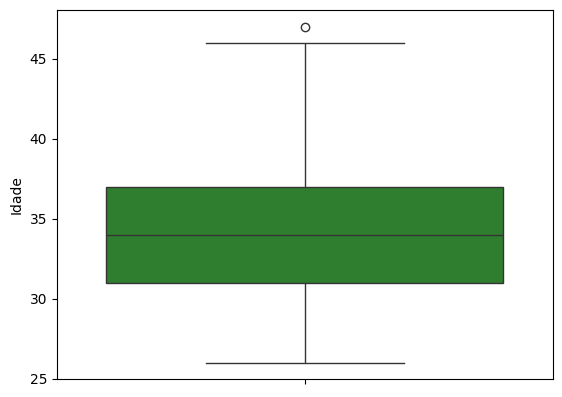

In [16]:
sns.boxplot(df_candidatos['idade'],color='forestgreen')
plt.ylabel('Idade')

In [17]:
df_candidatos['genero'].unique()

array(['Masculino', 'Feminino', 'M', 'feminino', 'F', 'Masc',
       'Nao informado'], dtype=object)

In [18]:
df_candidatos['genero'] = df_candidatos['genero'].replace('M', 'Masculino')
df_candidatos['genero'] = df_candidatos['genero'].replace('F', 'Feminino')
df_candidatos['genero'] = df_candidatos['genero'].replace('feminino', 'Feminino')
df_candidatos['genero'] = df_candidatos['genero'].replace('Masc', 'Masculino')

In [19]:
sorted(df_candidatos['cidade_residencia'].unique())

['Adamantina',
 'Altinópolis',
 'Americana',
 'Andradina',
 'Anápolis',
 'Aparecida de Goiânia',
 'Aracaju',
 'Araraquara',
 'Assis',
 'Atibaia',
 'Avaré',
 'Barueri',
 'Batatais',
 'Bauru',
 'Bebedouro',
 'Belo Horizonte',
 'Belém',
 'Birigui',
 'Blumenau',
 'Boa Vista',
 'Botucatu',
 'Bragança Paulista',
 'Brasília',
 'Brodowski',
 'Cajuru',
 'Campinas',
 'Campo Grande',
 'Campos dos Goytacazes',
 'Canoas',
 'Carapicuíba',
 'Caruaru',
 'Cascavel',
 'Catanduva',
 'Caxias do Sul',
 'Contagem',
 'Cotia',
 'Cravinhos',
 'Cruzeiro',
 'Cuiabá',
 'Curitiba',
 'Diadema',
 'Dracena',
 'Dumont',
 'Duque de Caxias',
 'Embu das Artes',
 'Feira de Santana',
 'Florianópolis',
 'Fortaleza',
 'Franca',
 'Garça',
 'Goiânia',
 'Guaratinguetá',
 'Guariba',
 'Guarujá',
 'Guarulhos',
 'Guatapará',
 'Hortolândia',
 'Indaiatuba',
 'Itaquaquecetuba',
 'Itatiba',
 'Itu',
 'Jaboatão dos Guararapes',
 'Jaboticabal',
 'Jacareí',
 'Jardinópolis',
 'Jaú',
 'Joinville',
 'João Pessoa',
 'Juiz de Fora',
 'Jundiaí',

In [20]:
df_candidatos['cidade_residencia'] = df_candidatos['cidade_residencia'].replace('RJ', 'Rio de Janeiro')
df_candidatos['cidade_residencia'] = df_candidatos['cidade_residencia'].replace('São Paulo - SP', 'São Paulo')
df_candidatos['cidade_residencia'] = df_candidatos['cidade_residencia'].replace('sao paulo', 'São Paulo')
df_candidatos['cidade_residencia'] = df_candidatos['cidade_residencia'].replace('santos', 'Santos')

In [21]:
df_candidatos['nivel_formacao'].unique()

array(['Graduação', 'Mestrado', 'Ensino Médio', 'Pós-graduação',
       'Superior Completo', 'Graduacao', 'Doutorado', 'Ensino Medio',
       'Superior Incompleto', 'Bacharelado', 'Técnico',
       '2º Grau Completo', '\\N', 'Superior'], dtype=object)

In [22]:
df_candidatos['nivel_formacao'] = df_candidatos['nivel_formacao'].replace('\\N', 'Não informou o nível de formação')
df_candidatos['nivel_formacao'] = df_candidatos['nivel_formacao'].replace('Graduacao', 'Superior Completo')
df_candidatos['nivel_formacao'] = df_candidatos['nivel_formacao'].replace('Graduação', 'Superior Completo')
df_candidatos['nivel_formacao'] = df_candidatos['nivel_formacao'].replace('Ensino Medio', 'Ensino Médio')
df_candidatos['nivel_formacao'] = df_candidatos['nivel_formacao'].replace('Bacharelado', 'Superior Completo')
df_candidatos['nivel_formacao'] = df_candidatos['nivel_formacao'].replace('2º Grau Completo', 'Ensino Médio')
df_candidatos['nivel_formacao'] = df_candidatos['nivel_formacao'].replace('Superior', 'Superior Completo')

In [23]:
df_candidatos['nivel_formacao'].unique()

array(['Superior Completo', 'Mestrado', 'Ensino Médio', 'Pós-graduação',
       'Doutorado', 'Superior Incompleto', 'Técnico',
       'Não informou o nível de formação'], dtype=object)

In [24]:
df_candidatos['anos_formacao'].map(type)

,anos_formacao
0,<class 'str'>
1,<class 'str'>
2,<class 'str'>
3,<class 'str'>
4,<class 'str'>
...,...
245,<class 'str'>
246,<class 'str'>
247,<class 'str'>
248,<class 'str'>


In [25]:
padrao_anos = r'^\d+$'
erros_anos=df_candidatos[ ~df_candidatos['anos_formacao'].str.match(padrao_anos,na=False)]
erros_anos

,id_candidato,nome_completo,email,data_nascimento,genero,cidade_residencia,nivel_formacao,anos_formacao,numero_de_vagas_candidatadas,idade
101,102,maria souza,maria.souza@yahoo.com.br,1992-08-20,Feminino,Rio de Janeiro,Ensino Médio,\N,1,33
107,108,Beatriz Lima,Não informou o email,1998-04-18,Feminino,Recife,Ensino Médio,\N,1,27
113,114,Amanda Alves,amanda.alves@yahoo.com.br,1997-03-17,Feminino,Campo Grande,Ensino Médio,\N,0,28
117,118,Eduarda Rocha,eduarda.rocha@gmail.com,1999-09-11,Feminino,Porto Velho,Não informou o nível de formação,\N,2,26
119,120,Giovanna Gomes,giovanna.gomes@yahoo.com,1993-02-23,Feminino,Aracaju,Ensino Médio,\N,1,32
127,128,Olivia Duarte,olivia.duarte@gmail.com,1997-11-19,Feminino,São Paulo,Ensino Médio,\N,0,28
128,129,Paulo Mendes,paulo.mendes@hotmail.com,1985-09-02,Masculino,São Paulo,Superior Completo,-4,5,40
137,138,Yago Campos,yago.campos@yahoo.com.br,1995-01-10,Masculino,Duque de Caxias,Ensino Médio,\N,1,30
143,144,Enzo Ibanez,enzo.ibanez@hotmail.com,1999-02-01,Masculino,Jaboatão dos Guararapes,Ensino Médio,\N,0,26
150,151,Lorena Santoro,lorena.santoro@yahoo.com.br,1993-09-04,Feminino,Aparecida de Goiânia,Ensino Médio,\N,1,32


In [26]:
df_medio = df_candidatos[df_candidatos['nivel_formacao']== 'Ensino Médio']
df_medio

,id_candidato,nome_completo,email,data_nascimento,genero,cidade_residencia,nivel_formacao,anos_formacao,numero_de_vagas_candidatadas,idade
101,102,maria souza,maria.souza@yahoo.com.br,1992-08-20,Feminino,Rio de Janeiro,Ensino Médio,\N,1,33
107,108,Beatriz Lima,Não informou o email,1998-04-18,Feminino,Recife,Ensino Médio,\N,1,27
113,114,Amanda Alves,amanda.alves@yahoo.com.br,1997-03-17,Feminino,Campo Grande,Ensino Médio,\N,0,28
119,120,Giovanna Gomes,giovanna.gomes@yahoo.com,1993-02-23,Feminino,Aracaju,Ensino Médio,\N,1,32
127,128,Olivia Duarte,olivia.duarte@gmail.com,1997-11-19,Feminino,São Paulo,Ensino Médio,\N,0,28
137,138,Yago Campos,yago.campos@yahoo.com.br,1995-01-10,Masculino,Duque de Caxias,Ensino Médio,\N,1,30
143,144,Enzo Ibanez,enzo.ibanez@hotmail.com,1999-02-01,Masculino,Jaboatão dos Guararapes,Ensino Médio,\N,0,26
150,151,Lorena Santoro,lorena.santoro@yahoo.com.br,1993-09-04,Feminino,Aparecida de Goiânia,Ensino Médio,\N,1,32
158,159,Úrsula Bastos,ursula.bastos@hotmail.com,1999-05-11,Feminino,Ponta Grossa,Ensino Médio,\N,0,26
168,169,Elisa Lins,elisa.lins@yahoo.com,1993-09-26,Feminino,Montes Claros,Ensino Médio,\N,1,32


In [27]:
df_candidatos['anos_formacao'] = df_candidatos['anos_formacao'].replace('\\N',np.nan)
df_candidatos['anos_formacao'] = pd.to_numeric(df_candidatos['anos_formacao'],errors='coerce')
df_candidatos['anos_formacao'] = df_candidatos['anos_formacao'].fillna(0)
df_candidatos['anos_formacao'] = df_candidatos['anos_formacao'].replace(-4,4)

Utilizado 0 para substituir, pois todos que não informaram os anos de formação ainda estão no ensino médio

<Axes: ylabel='numero_de_vagas_candidatadas'>

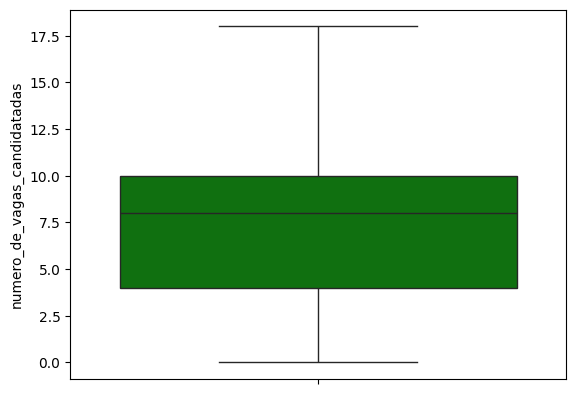

In [28]:
sns.boxplot(df_candidatos['numero_de_vagas_candidatadas'],color='green')

# Tabela Candidaturas

In [29]:
df_candidaturas.isnull().sum()

,0
id_candidatura,0
id_candidato,0
id_vaga,0
data_candidatura,0
origem,0
curriculo_texto,5
status_cand,0
experiencia_media_anos,0
contratado,0


In [30]:
df_candidaturas.dtypes

,0
id_candidatura,int64
id_candidato,int64
id_vaga,int64
data_candidatura,object
origem,object
curriculo_texto,object
status_cand,object
experiencia_media_anos,object
contratado,int64


In [31]:
df_candidaturas['id_vaga'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [32]:
padra_data = r'^\d{4}-\d{2}-\d{2}$'
erro_data = df_candidaturas[
    ~df_candidaturas['data_candidatura'].str.match(padrao_data,na=False)
]
erro_data

,id_candidatura,id_candidato,id_vaga,data_candidatura,origem,curriculo_texto,status_cand,experiencia_media_anos,contratado


In [33]:
df_candidaturas['data_candidatura'] = pd.to_datetime(df_candidaturas['data_candidatura'],errors='coerce')
data_ref = pd.to_datetime('2025-8-13')
df_candidaturas['tempo_candidatura']= (
    data_ref - df_candidaturas['data_candidatura']
).dt.days

In [34]:
df_candidaturas['tempo_candidatura'].sort_values()

,tempo_candidatura
8,12
17,12
26,12
35,12
53,12
...,...
219,578
240,579
175,580
137,582


<Axes: ylabel='tempo_candidatura'>

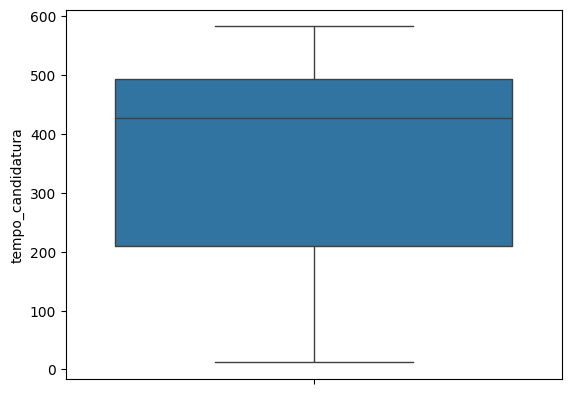

In [35]:
sns.boxplot(df_candidaturas['tempo_candidatura'])

In [36]:
df_candidaturas['origem'].unique()

array(['linkedin', 'site', 'indicacao', 'email', 'facebook', 'instagram',
       'Site', 'indicação', 'LINKEDIN', 'site da empresa', 'Linkedin',
       'Indicação', 'vagas.com', 'Catho', 'LinkedIn', 'Site da Empresa'],
      dtype=object)

In [37]:
df_candidaturas['origem'] = df_candidaturas['origem'].replace({
    'site': 'Site',
    'Site da Empresa': 'Site',
    'site da empresa': 'Site',
    'linkedin': 'LinkedIn',
    'Linkedin': 'LinkedIn',
    'LINKEDIN': 'LinkedIn',
    'indicacao': 'Indicação',
    'indicação' : 'Indicação',
    'facebook': 'Facebook',
    'instagram': 'Instagram'
})

In [38]:
df_candidaturas['origem'].unique()

array(['LinkedIn', 'Site', 'Indicação', 'email', 'Facebook', 'Instagram',
       'vagas.com', 'Catho'], dtype=object)

In [39]:
df_candidaturas['curriculo_texto'] = df_candidaturas['curriculo_texto'].fillna(r'\N')
erro_cv = df_candidaturas[df_candidaturas['curriculo_texto']==r'\N']
erro_cv

,id_candidatura,id_candidato,id_vaga,data_candidatura,origem,curriculo_texto,status_cand,experiencia_media_anos,contratado,tempo_candidatura
104,105,105,11,2024-05-20,Site,\N,Entrevista Tecnica,8.00,0,450
113,114,114,1,2024-02-05,Site,\N,triagem,0.00,0,555
117,118,118,10,2024-01-20,vagas.com,\N,triagem,\N,0,571
126,127,127,8,2024-06-18,Indicação,\N,entrevista,10.50,0,421
137,138,138,1,2024-01-09,vagas.com,\N,recusado,\N,0,582
142,143,143,9,2024-06-13,LinkedIn,\N,recusado,11.00,0,426
158,159,159,1,2024-01-25,vagas.com,\N,triagem,0.00,0,566
167,168,168,11,2024-01-18,Indicação,\N,entrevista,8.00,0,573
175,176,176,1,2024-01-11,vagas.com,\N,triagem,0.00,0,580
186,187,187,8,2024-05-26,Site,\N,Entrevista RH,7.00,0,444


In [40]:
df_candidaturas['curriculo_texto'] = df_candidaturas['curriculo_texto'].replace(r'\N','Sem resumo de currículo')

In [41]:
df_candidaturas['status_cand'].unique()

array(['contratado', 'recusado', 'entrevista', 'triagem',
       'Entrevista Tecnica', 'Entrevista RH'], dtype=object)

In [42]:
df_candidaturas['status_cand'] = df_candidaturas['status_cand'].replace({
    'Entrevista Tecnica' : 'entrevista',
    'Entrevista RH' : 'entrevista'
})

In [43]:
padrao = r'^\d+(\.\d+)?$'
erro = df_candidaturas[
    ~df_candidaturas['experiencia_media_anos'].str.match(padrao,na=False)
]
erro

,id_candidatura,id_candidato,id_vaga,data_candidatura,origem,curriculo_texto,status_cand,experiencia_media_anos,contratado,tempo_candidatura
107,108,108,1,2024-01-30,vagas.com,Estudante de Letras buscando estágio em revisã...,recusado,\N,0,561
117,118,118,10,2024-01-20,vagas.com,Sem resumo de currículo,triagem,\N,0,571
137,138,138,1,2024-01-09,vagas.com,Sem resumo de currículo,recusado,\N,0,582
168,169,169,1,2024-06-06,vagas.com,Estou no último ano do ensino médio e busco um...,recusado,\N,0,433
191,192,192,1,2024-01-16,vagas.com,Busco uma oportunidade para reingressar no mer...,recusado,\N,0,575
248,249,249,1,2024-06-25,vagas.com,Em busca de recolocação profissional.,triagem,\N,0,414


In [44]:
df_candidaturas['experiencia_media_anos'] = df_candidaturas['experiencia_media_anos'].replace(r'\N',np.nan)
df_candidaturas['experiencia_media_anos'] = pd.to_numeric(df_candidaturas['experiencia_media_anos'],errors='coerce')
df_candidaturas['experiencia_media_anos'] = df_candidaturas['experiencia_media_anos'].fillna(
    df_candidaturas['experiencia_media_anos'].median()
    )

# Tabela Entrevistas


In [45]:
df_entrevistas.dtypes

,0
id_entrevista,int64
id_candidatura,int64
entrevistador,object
data_entrevista,object
nota,object
feedback,object


In [46]:
df_entrevistas.isnull().sum()

,0
id_entrevista,0
id_candidatura,0
entrevistador,0
data_entrevista,0
nota,0
feedback,0


In [47]:
df_entrevistas['entrevistador'].unique()

array(['Ana Silva', 'Bruno Costa', 'Carla Mendes', 'Diego Rocha',
       'Eduardo Lima', 'Fernanda Souza', 'Gabriel Pereira',
       'Helena Castro', 'Igor Ramos', 'Juliana Alves', 'Luís Oliveira',
       'Marina Santos', '   Helena Castro', 'juliana alves',
       'carla mendes'], dtype=object)

In [48]:
df_merged = df_entrevistas.merge(
    df_candidaturas,
    on='id_candidatura',
    how='inner'
)
entrevistadores = df_merged.groupby('entrevistador')['id_vaga'].size()
entrevistadores

,id_vaga
entrevistador,
Helena Castro,1
Ana Silva,22
Bruno Costa,49
Carla Mendes,18
Diego Rocha,18
Eduardo Lima,26
Fernanda Souza,18
Gabriel Pereira,15
Helena Castro,11


In [49]:
df_entrevistas['entrevistador'] = df_entrevistas['entrevistador'].replace({
    'carla mendes' : 'Carla Mendes',
    'juliana alves' : 'Juliana Alves'
})

In [50]:
padra_data = r'^\d{4}-\d{2}-\d{2}$'
erro_data = df_entrevistas[
    ~df_entrevistas['data_entrevista'].str.match(padrao_data,na=False)
]
erro_data

,id_entrevista,id_candidatura,entrevistador,data_entrevista,nota,feedback


In [51]:
df_entrevistas['data_entrevista'] = pd.to_datetime(df_entrevistas['data_entrevista'],errors = 'coerce')
data_ref = pd.to_datetime('2025-8-13')
df_entrevistas['tempo_entrevista'] = (
    data_ref - df_entrevistas['data_entrevista']
).dt.days

In [52]:
df_entrevistas['tempo_entrevista']

,tempo_entrevista
0,323
1,259
2,242
3,197
4,148
...,...
245,532
246,498
247,427
248,442


In [53]:
padrao_num = r'^\d+(\.\d+)?$'
erro_num = df_entrevistas[
    ~df_entrevistas['nota'].str.match(padrao_num,na=False)
]
erro_num

,id_entrevista,id_candidatura,entrevistador,data_entrevista,nota,feedback,tempo_entrevista
116,117,127,Bruno Costa,2024-06-22,\N,Candidato não compareceu à entrevista.,417
147,148,168,Diego Rocha,2024-01-25,\N,Feedback pendente do gestor.,566
162,163,187,Bruno Costa,2024-06-01,\N,Entrevista com o gestor da área. Aguardando fe...,438


In [54]:
df_entrevistas['nota'] = df_entrevistas['nota'].replace(r'\N',np.nan)
df_entrevistas['nota'] = pd.to_numeric(df_entrevistas['nota'])
df_entrevistas['nota'] = df_entrevistas['nota'].replace(np.nan,df_entrevistas['nota'].median())

# Tabela Experiências

In [55]:
df_experiencias.dtypes

,0
id_experiencia,int64
id_candidato,int64
empresa,object
cargo,object
data_inicio,object
data_fim,object
anos_experiencia,object


In [56]:
df_experiencias.isnull().sum()

,0
id_experiencia,0
id_candidato,0
empresa,0
cargo,0
data_inicio,0
data_fim,0
anos_experiencia,0


In [57]:
sorted(df_experiencias['empresa'].unique())

['   DigitalMind',
 'Agência Criativa',
 'AlphaTech',
 'Centro de Neurociência',
 'Clínica Médica',
 'CodeWorks',
 'Comex Global',
 'Comunica S/A',
 'Construtora Segura',
 'Consultoria Estratégica',
 'Contabilidade Certa',
 'Data Experts',
 'DigitalMind',
 'Escola ABC',
 'Escritório de Advocacia',
 'Escritório de Engenharia',
 'Estúdio de Animação',
 'Fundação Cultural',
 'Game Studio',
 'GeoMineração',
 'Global Systems',
 'Hospital Central',
 'Indústria ABC',
 'Indústria Aeroespacial',
 'Indústria Forte',
 'InfoPlus',
 'Inova Corp',
 'Instituto Oceanográfico',
 'Instituto de Pesquisa',
 'Instituto de Pesquisa Social',
 'Jornal Verdade',
 'Laboratório Genoma',
 'Lanchonete',
 'Loja de Roupas',
 'Mercado Central',
 'Metalúrgica Nacional',
 'NEXTGEN SOFTWARE',
 'NextGen Software',
 'Observatório Nacional',
 'Oficina Mecânica',
 'Padaria do Bairro',
 'Petro Indústria',
 'PharmaCorp',
 'Produtora de Vídeo',
 'Smart Solutions',
 'SoftHouse',
 'Supermercado Preço Bom',
 'Tech Solutions Ltda'

In [58]:
df_n = df_experiencias[df_experiencias['empresa']==r'\N']
df_n

,id_experiencia,id_candidato,empresa,cargo,data_inicio,data_fim,anos_experiencia
229,236,102,\N,Atendente,2022-01-01,2023-12-31,2.00
232,239,118,\N,\N,\N,\N,\N
234,241,128,\N,Jovem Aprendiz,2022-02-01,2023-08-01,1.50
237,244,144,\N,Trabalho informal,2023-01-01,2023-12-31,1.00
242,249,169,\N,\N,\N,\N,\N


In [59]:
df_experiencias['empresa'] = df_experiencias['empresa'].replace(r'\N','Não foi informada a Empresa')

In [60]:
df_n = df_experiencias[df_experiencias['cargo']==r'\N']
df_n

,id_experiencia,id_candidato,empresa,cargo,data_inicio,data_fim,anos_experiencia
232,239,118,Não foi informada a Empresa,\N,\N,\N,\N
242,249,169,Não foi informada a Empresa,\N,\N,\N,\N


In [61]:
df_experiencias['cargo'] = df_experiencias['cargo'].replace(r'\N', 'Não foi informado o cargo')

In [62]:
erro_data = df_experiencias[
    ~df_experiencias['data_inicio'].str.match(padrao_data,na=False)
]
erro_data

,id_experiencia,id_candidato,empresa,cargo,data_inicio,data_fim,anos_experiencia
232,239,118,Não foi informada a Empresa,Não foi informado o cargo,\N,\N,\N
242,249,169,Não foi informada a Empresa,Não foi informado o cargo,\N,\N,\N


In [63]:
erro_data = df_experiencias[
    ~df_experiencias['data_fim'].str.match(padrao_data,na=False)
]
erro_data

,id_experiencia,id_candidato,empresa,cargo,data_inicio,data_fim,anos_experiencia
102,103,103,Global Systems,Gerente de Projetos Sênior,2018-03-10,\N,6.20
105,106,105,Data Experts,Arquiteto de Dados,2019-05-01,\N,5.00
108,109,107,NextGen Software,Cientista de Dados Sênior,2020-01-01,\N,4.50
116,117,113,WebTech Digital,Programador PHP,2021-01-01,\N,3.40
117,118,115,Data Experts,Arquiteto de Soluções,2017-08-01,\N,6.80
121,122,119,CodeWorks,Desenvolvedor .NET Pleno,2022-01-15,\N,2.50
122,123,121,AlphaTech,Engenheiro de Dados Sênior,2018-06-01,\N,6.00
125,126,123,Inova Corp,Analista de Segurança da Informação,2019-08-01,\N,4.80
129,130,127,Global Systems,Gerente de TI,2016-01-01,\N,8.50
131,132,130,Data Experts,DBA Oracle Sênior,2010-02-01,\N,14.10


In [64]:
df_experiencias['data_inicio'] = df_experiencias['data_inicio'].replace(r'\N',np.nan)
df_experiencias['data_inicio'] = pd.to_datetime(df_experiencias['data_inicio'])
df_experiencias['data_inicio'] = df_experiencias['data_inicio'].replace(
    np.nan,df_experiencias['data_inicio'].median()
 )



df_experiencias['data_fim'] = df_experiencias['data_fim'].replace(r'\N',np.nan)
df_experiencias['data_fim'] = pd.to_datetime(df_experiencias['data_fim'])
df_experiencias['data_fim'] = df_experiencias['data_fim'].replace(
    np.nan, data_ref
)

Foi escolhido a data de referencia ficticia para pessoas que não informaram sua data_fim, seja por que ainda estão no emprego, ou por simplesmente não informarem

In [65]:
df_experiencias['dias_experiencia'] = (
    df_experiencias['data_fim'] - df_experiencias['data_inicio']
).dt.days

In [66]:
df_experiencias['dias_experiencia']

,dias_experiencia
0,850
1,1629
2,1165
3,1275
4,1094
...,...
239,729
240,348
241,669
242,2326


In [67]:
erro_num = df_experiencias[
  ~df_experiencias['anos_experiencia'].str.match(padrao_num,na=False)
]
erro_num

,id_experiencia,id_candidato,empresa,cargo,data_inicio,data_fim,anos_experiencia,dias_experiencia
232,239,118,Não foi informada a Empresa,Não foi informado o cargo,2019-04-01,2025-08-13,\N,2326
242,249,169,Não foi informada a Empresa,Não foi informado o cargo,2019-04-01,2025-08-13,\N,2326


In [68]:
df_experiencias['anos_experiencia'] = df_experiencias['anos_experiencia'].replace(r'\N',np.nan)
df_experiencias['anos_experiencia'] = pd.to_numeric(df_experiencias['anos_experiencia'])
df_experiencias['anos_experiencia'] = df_experiencias['anos_experiencia'].replace(
    np.nan,df_experiencias['anos_experiencia'].median()
    )